# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:
#Define empty lists to store values
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : hilo
Processing Record 2 of Set 1 : puerto ayora
Processing Record 3 of Set 1 : dikson
Processing Record 4 of Set 1 : atuona
City not found. Skipping...
Processing Record 5 of Set 1 : kushiro
Processing Record 6 of Set 1 : san rafael
Processing Record 7 of Set 1 : barrow
Processing Record 8 of Set 1 : hobart
Processing Record 9 of Set 1 : aklavik
Processing Record 10 of Set 1 : bambous virieux
Processing Record 11 of Set 1 : punta arenas
Processing Record 12 of Set 1 : zhenhai
Processing Record 13 of Set 1 : port alfred
City not found. Skipping...
Processing Record 14 of Set 1 : batagay-alyta
Processing Record 15 of Set 1 : vestmannaeyjar
Processing Record 16 of Set 1 : naze
Processing Record 17 of Set 1 : bredasdorp
Processing Record 18 of Set 1 : chuy
Processing Record 19 of Set 1 : nueva loja
Processing Record 20 of Set 1 : ribeira grande
Processing Record 21 of Set 1 : kapaa
Processing Record 22 

Processing Record 32 of Set 4 : clyde river
City not found. Skipping...
Processing Record 33 of Set 4 : santa maria
Processing Record 34 of Set 4 : cranbrook
Processing Record 35 of Set 4 : balykshi
City not found. Skipping...
Processing Record 36 of Set 4 : calamar
Processing Record 37 of Set 4 : saint-joseph
Processing Record 38 of Set 4 : dong xoai
Processing Record 39 of Set 4 : morondava
Processing Record 40 of Set 4 : rio tuba
Processing Record 41 of Set 4 : pochutla
City not found. Skipping...
Processing Record 42 of Set 4 : ayagoz
Processing Record 43 of Set 4 : skelleftea
Processing Record 44 of Set 4 : mantua
Processing Record 45 of Set 4 : souillac
City not found. Skipping...
Processing Record 46 of Set 4 : castro
Processing Record 47 of Set 4 : beringovskiy
Processing Record 48 of Set 4 : sao filipe
Processing Record 49 of Set 4 : poum
Processing Record 50 of Set 4 : namibe
Processing Record 0 of Set 5 : hirara
Processing Record 1 of Set 5 : waycross
Processing Record 2 of 

Processing Record 16 of Set 8 : oktyabrskoye
Processing Record 17 of Set 8 : takestan
Processing Record 18 of Set 8 : eyl
Processing Record 19 of Set 8 : esperance
Processing Record 20 of Set 8 : savannah bight
City not found. Skipping...
Processing Record 21 of Set 8 : andrews
Processing Record 22 of Set 8 : iracoubo
Processing Record 23 of Set 8 : meadow lake
Processing Record 24 of Set 8 : port huron
Processing Record 25 of Set 8 : touros
Processing Record 26 of Set 8 : husavik
Processing Record 27 of Set 8 : flin flon
Processing Record 28 of Set 8 : sfantu gheorghe
Processing Record 29 of Set 8 : goderich
Processing Record 30 of Set 8 : hamilton
Processing Record 31 of Set 8 : jutai
Processing Record 32 of Set 8 : richards bay
Processing Record 33 of Set 8 : florence
Processing Record 34 of Set 8 : la ronge
Processing Record 35 of Set 8 : drayton valley
Processing Record 36 of Set 8 : boguchany
Processing Record 37 of Set 8 : jalu
Processing Record 38 of Set 8 : jining
Processing R

Processing Record 50 of Set 11 : vostok
Processing Record 0 of Set 12 : price
Processing Record 1 of Set 12 : mbigou
Processing Record 2 of Set 12 : abha
City not found. Skipping...
Processing Record 3 of Set 12 : juba
Processing Record 4 of Set 12 : turinsk
Processing Record 5 of Set 12 : jibuti
Processing Record 6 of Set 12 : qiongshan
Processing Record 7 of Set 12 : lokosovo
Processing Record 8 of Set 12 : rawlins
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Creating city dataframe
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:
# Count data
weather_dict.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [9]:
# Display the Data Frame
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,20,US,1612983720,68,19.7297,-155.0900,71.01,5.75
1,Puerto Ayora,75,EC,1612983808,83,-0.7393,-90.3518,80.60,3.44
2,Dikson,94,RU,1612983808,89,73.5069,80.5464,-20.83,7.96
3,Atuona,2,PF,1612983808,75,-9.8000,-139.0333,79.18,17.27
4,Kushiro,1,JP,1612983809,93,42.9750,144.3747,15.80,4.43


In [32]:
# Save city data into a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Basic Stats
stats = weather_dict["Humidity"].describe(include = "all")

In [14]:
#  Get the indices of cities that have humidity over 100%.
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
stats

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    569.000000
mean      71.455185
std       19.714115
min        8.000000
25%       62.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

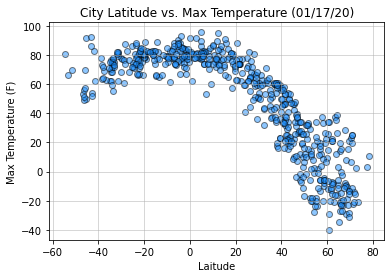

In [15]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

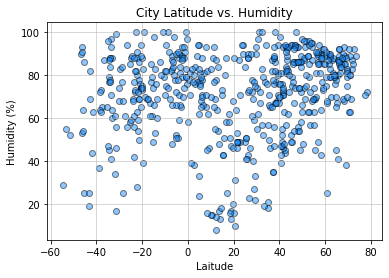

In [16]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

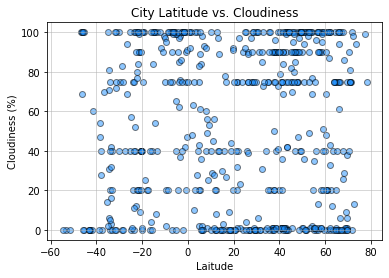

In [17]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

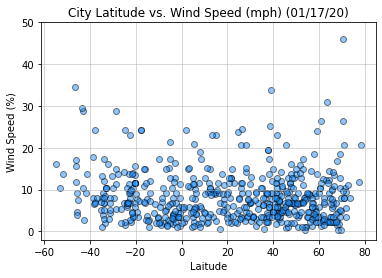

In [18]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "dodgerblue", edgecolor = "black", alpha = 0.5)
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_df = weather_dict.loc[weather_dict["Lat"] < 0]

In [35]:
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,20,US,1612983720,68,19.7297,-155.0900,71.01,5.75
2,Dikson,94,RU,1612983808,89,73.5069,80.5464,-20.83,7.96
4,Kushiro,1,JP,1612983809,93,42.9750,144.3747,15.80,4.43
6,Barrow,75,US,1612983809,69,71.2906,-156.7887,-22.00,10.36
8,Aklavik,0,CA,1612983809,68,68.2191,-135.0107,-29.20,4.61


In [36]:
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Puerto Ayora,75,EC,1612983808,83,-0.7393,-90.3518,80.60,3.44
3,Atuona,2,PF,1612983808,75,-9.8000,-139.0333,79.18,17.27
5,San Rafael,81,AR,1612983608,45,-34.6177,-68.3301,76.23,8.03
7,Hobart,0,AU,1612983623,82,-42.8794,147.3294,53.60,10.36
9,Bambous Virieux,40,MU,1612983809,74,-20.3428,57.7575,80.60,11.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

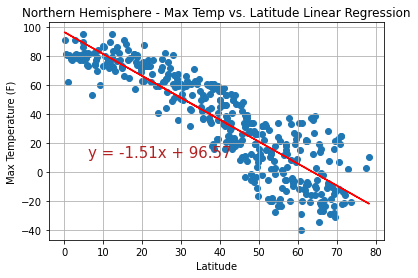

In [37]:
# Define function for creating linear agression and scatter plot
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH Max temp vs Lat LR.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

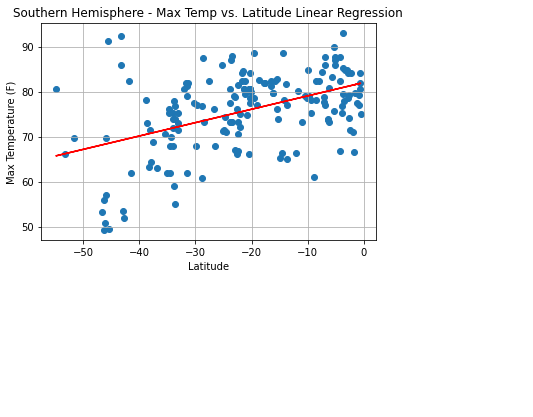

In [38]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH Max temp vs Lat LR.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

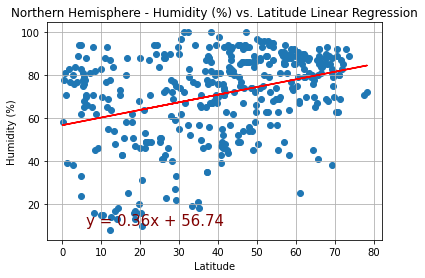

In [39]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH - Humidity (%) vs. Lat LR.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

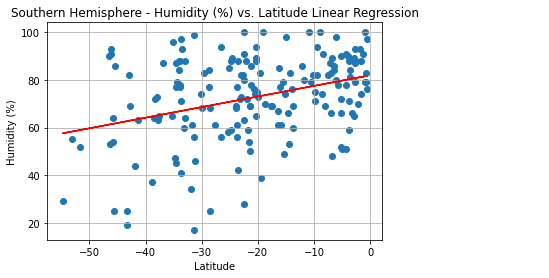

In [40]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH - Humidity (%) vs. Lat LR.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

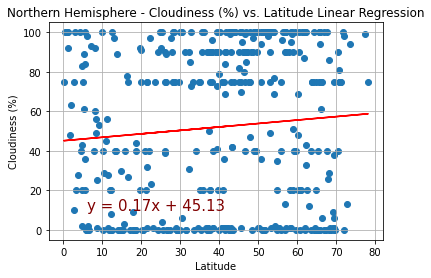

In [41]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH - Cloudiness (%) vs. Lat LR.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

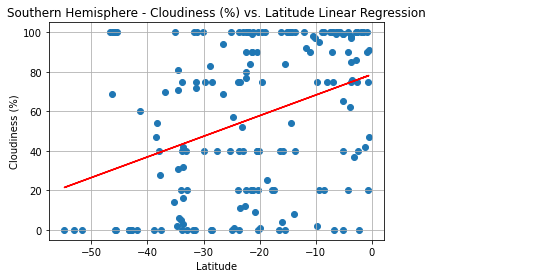

In [42]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH - Cloudiness (%) vs. Lat LR.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

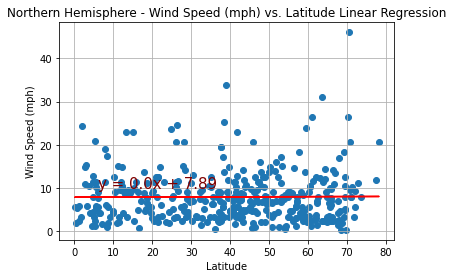

In [43]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/NH - Wind Speed vs. Lat LR.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

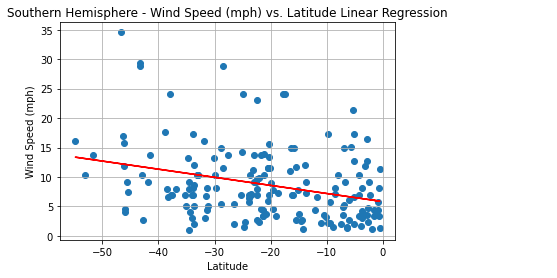

In [44]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="maroon")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/SH - Wind Speed vs. Lat LR.png")
plt.show()